<a href="https://colab.research.google.com/github/David-Gentil/Regressao-Linear_DNC/blob/main/Machine_learning_MEC_2017_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução
Este notebook foi criado para abordar o desafio de criar um modelo de machine learning para prever a taxa de aprovação de alunos em 2017, com base nos dados de aprovação de 2015 e 2016.

O Ministério da Educação solicitou a criação de um modelo capaz de fazer esta previsão, usando regressão linear e avaliando métricas importantes como R2, MAE, MSE e RMSE.

##Preparando os dados
Felizmente, como estamos utilizando uma base de dados já conhecida, pode-se assumir que esses processos de limpeza já foram feitos anteriormente.

Portanto, para resolver esse desafio, podemos pular essa etapa e partir direto para o treinamento do modelo.

In [ ]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf

In [ ]:
#Montando o Drive do google

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importando e plotando base de dados

Aprovacao = pd.read_excel('/content/drive/MyDrive/RID187211_Módulo_06/Aprovacao_alunos.xlsx')
Aprovacao.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [ ]:
#Plotando a descrição dos dados

Aprovacao.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
#PLotando as informações dos dados

Aprovacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


##Análise gráfica dos dados

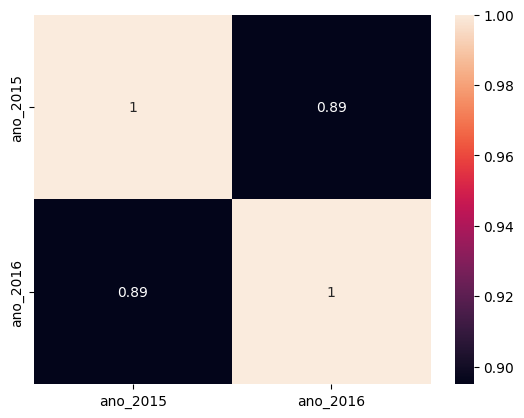

In [ ]:
#Identificando as correlações entre os dados utilizando o heatmap

sns.heatmap(Aprovacao.corr(), annot=True);

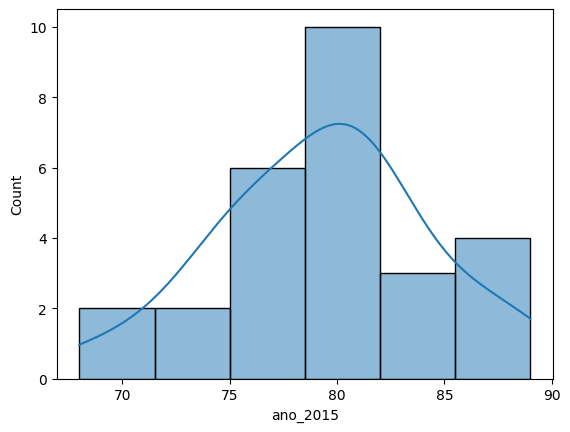

In [ ]:
#Plotando o histograma do ano de 2015

sns.histplot(data=Aprovacao, x='ano_2015', kde=True);

6

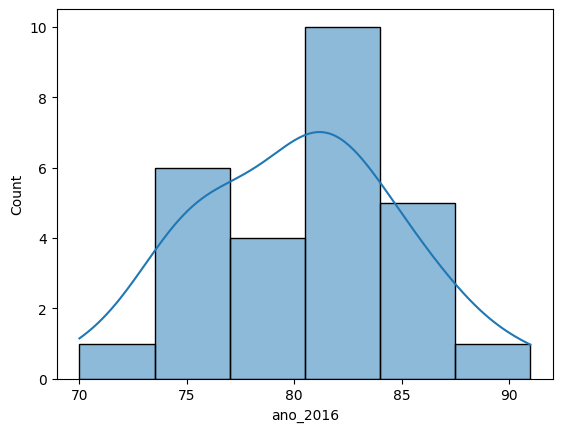

In [ ]:
#Plotando o histograma do ano de 2016

sns.histplot(data=Aprovacao, x='ano_2016', kde=True);6

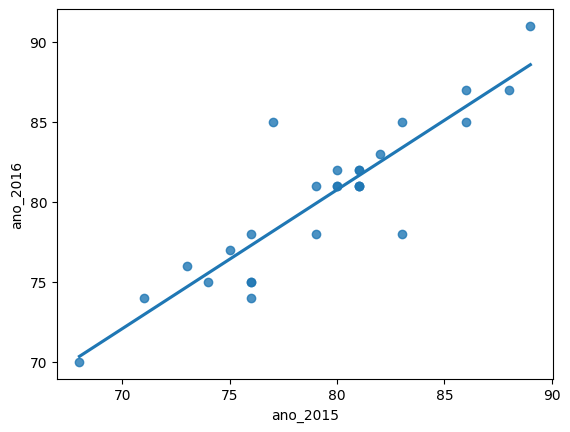

In [ ]:
#plotano gráfico de correlação

sns.regplot(x='ano_2015', y='ano_2016', ci= None, data=Aprovacao);

##Treinando o modelo

In [ ]:
#modelo MRLS

function = 'ano_2016 ~ ano_2015-1'
model = smf.ols(formula=function, data=Aprovacao).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.397e+04
Date:                Sun, 30 Mar 2025   Prob (F-statistic):                    4.76e-42
Time:                        01:15:49   Log-Likelihood:                         -59.863
No. Observations:                  27   AIC:                                      121.7
Df Residuals:                      26   BIC:                                      123.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#Definindo variáveis

x = Aprovacao[['ano_2016']]
y = Aprovacao[['ano_2015']]

In [ ]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Definindo R² de treino

r_sq = lr.score(x_train, y_train)
print(f'R²: {round(r_sq, 3)}')

R²: 0.752


In [ ]:
#Definindo as métricas de treino

y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 2.1079734219269066
MSE: 6.745660459965463
RMSE: 2.597240932213541


In [ ]:
#Definindo as métricas de teste

y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 2.1937984496123994
MSE: 7.815891472868209
RMSE: 2.7956915911574027
